In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import random
import cv2
import sklearn
import torch
from PIL import Image
from pathlib import Path
from fastai.vision.all import *
from fastai.callback import *
from fastai.metrics import error_rate
from fastai.callback.tracker import EarlyStoppingCallback
from fastai.vision.all import get_image_files
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings ('ignore')

c:\Users\virin\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [11]:
path = Path(r"C:\Users\virin\OneDrive\Desktop\Synapse 2.0-Datadynamos\Images")

In [12]:
path.ls()

(#2) [Path('C:/Users/virin/OneDrive/Desktop/Synapse 2.0-Datadynamos/Images/AiArtData'),Path('C:/Users/virin/OneDrive/Desktop/Synapse 2.0-Datadynamos/Images/RealArt')]

In [13]:
dls = ImageDataLoaders.from_folder(path, train='train', valid_pct=0.2, 
                                          item_tfms=Resize(460), 
                                          batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)])

In [14]:
len(dls.train_ds)

780

In [15]:
len(dls.valid_ds)

194

In [16]:
print(dls.vocab)

['AiArtData', 'RealArt']


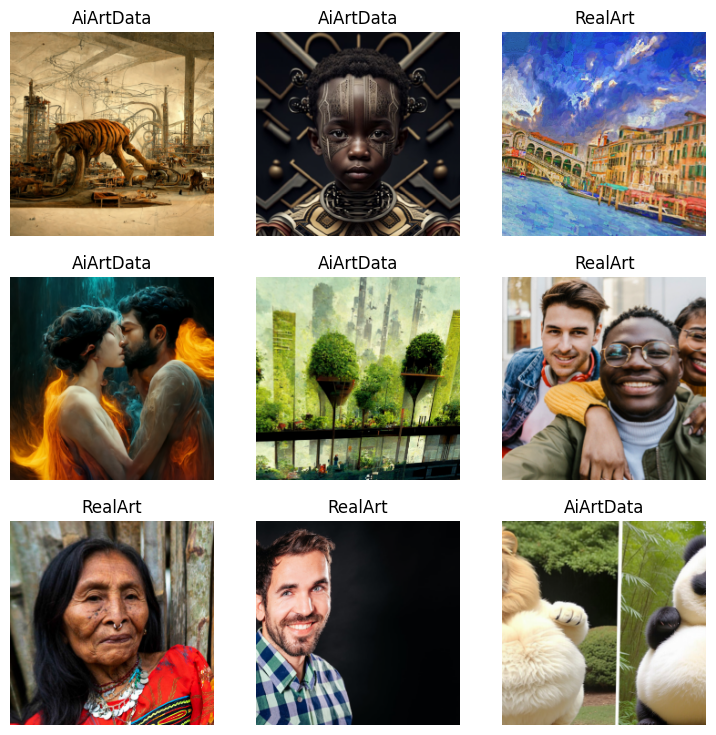

In [17]:
dls.show_batch()

In [18]:
learn = vision_learner(dls, resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\virin/.cache\torch\hub\checkpoints\resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:07<00:00, 11.6MB/s]


In [19]:
learn.summary()

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

In [20]:
learn.model_dir = r"C:\Users\virin\OneDrive\Desktop\Synapse 2.0-Datadynamos\Images"

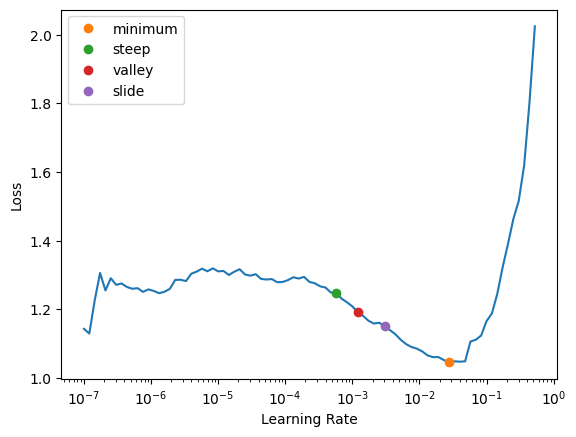

In [21]:
suggest_funcs = (minimum, steep, valley, slide)

lrs = learn.lr_find(suggest_funcs=suggest_funcs)

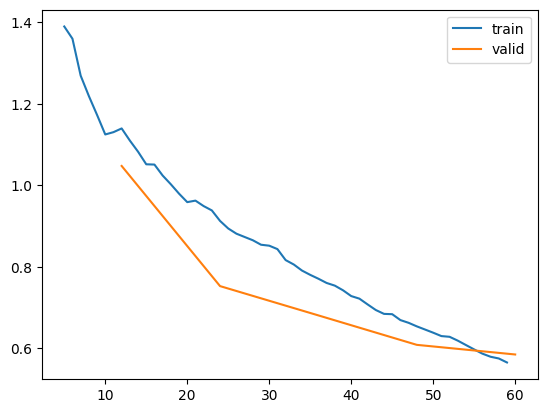

In [22]:
learn.fit_one_cycle(5, lr_max=slice(lrs.valley, lrs.slide))
learn.recorder.plot_loss()

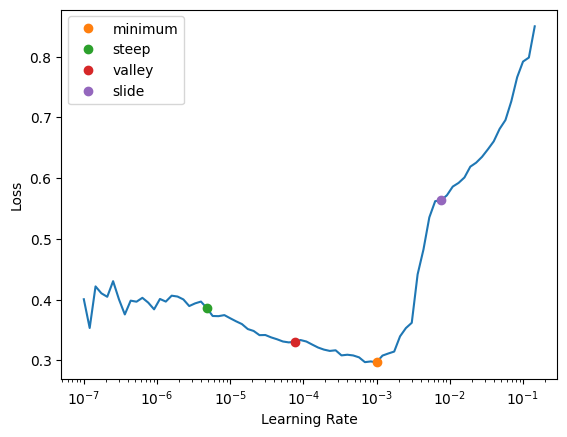

In [23]:
learn.unfreeze()
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))


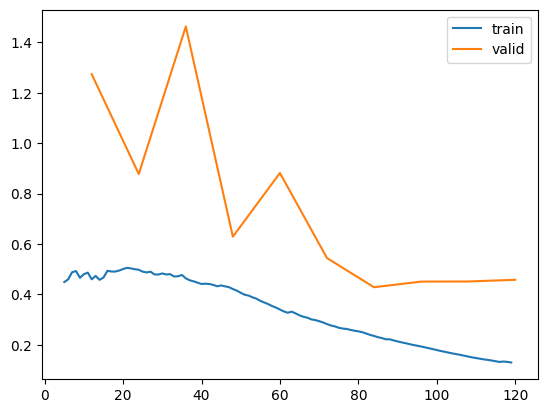

In [24]:
learn.fit_one_cycle(10, lr_max=slice(lrs.valley, lrs.slide))
learn.recorder.plot_loss()

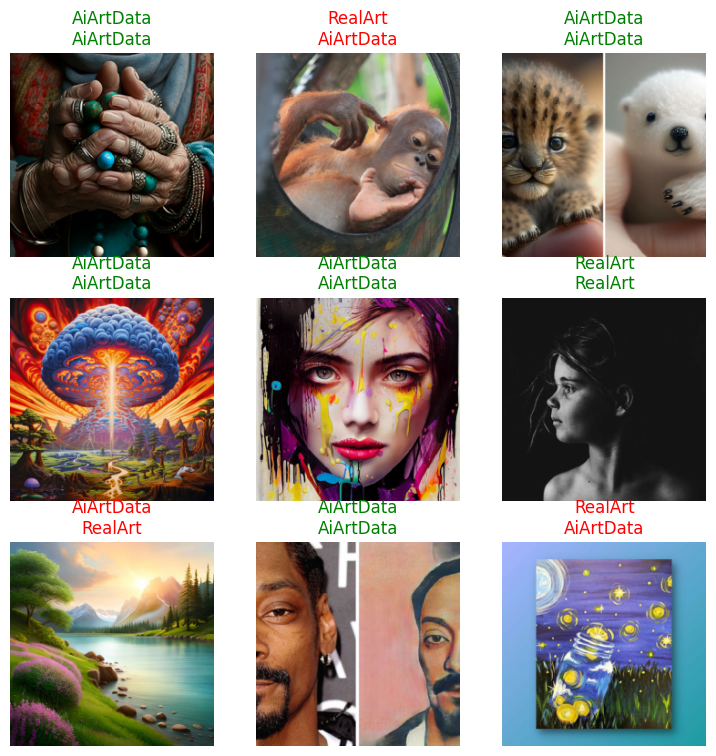

In [25]:
learn.show_results()

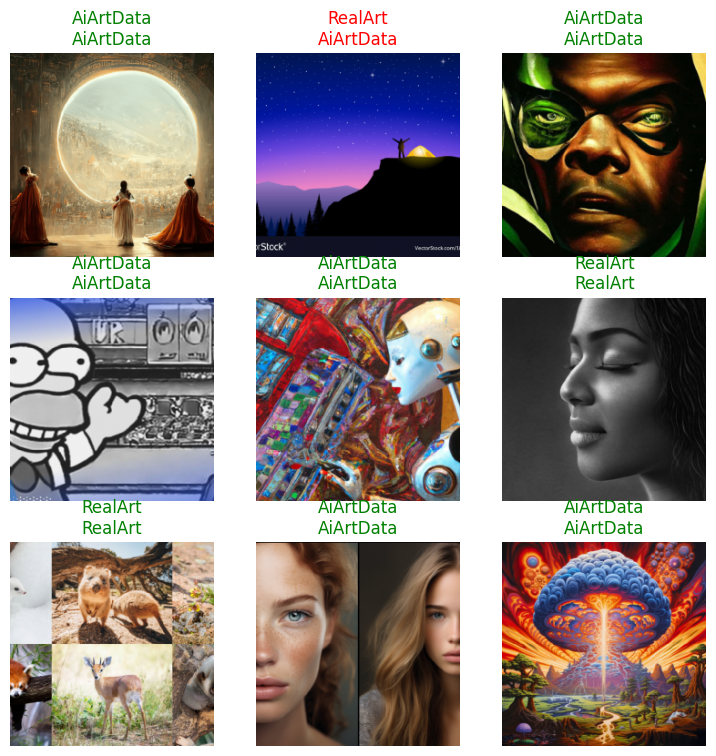

In [41]:
learn.show_results()

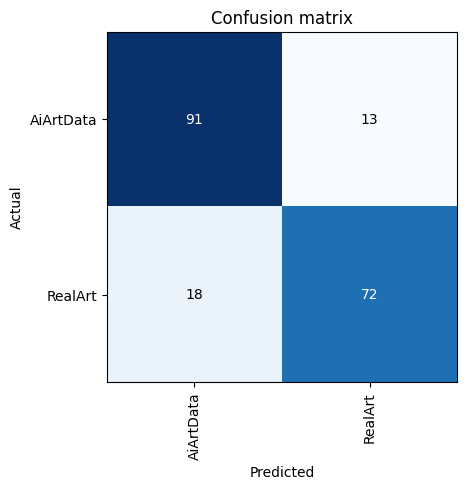

In [26]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

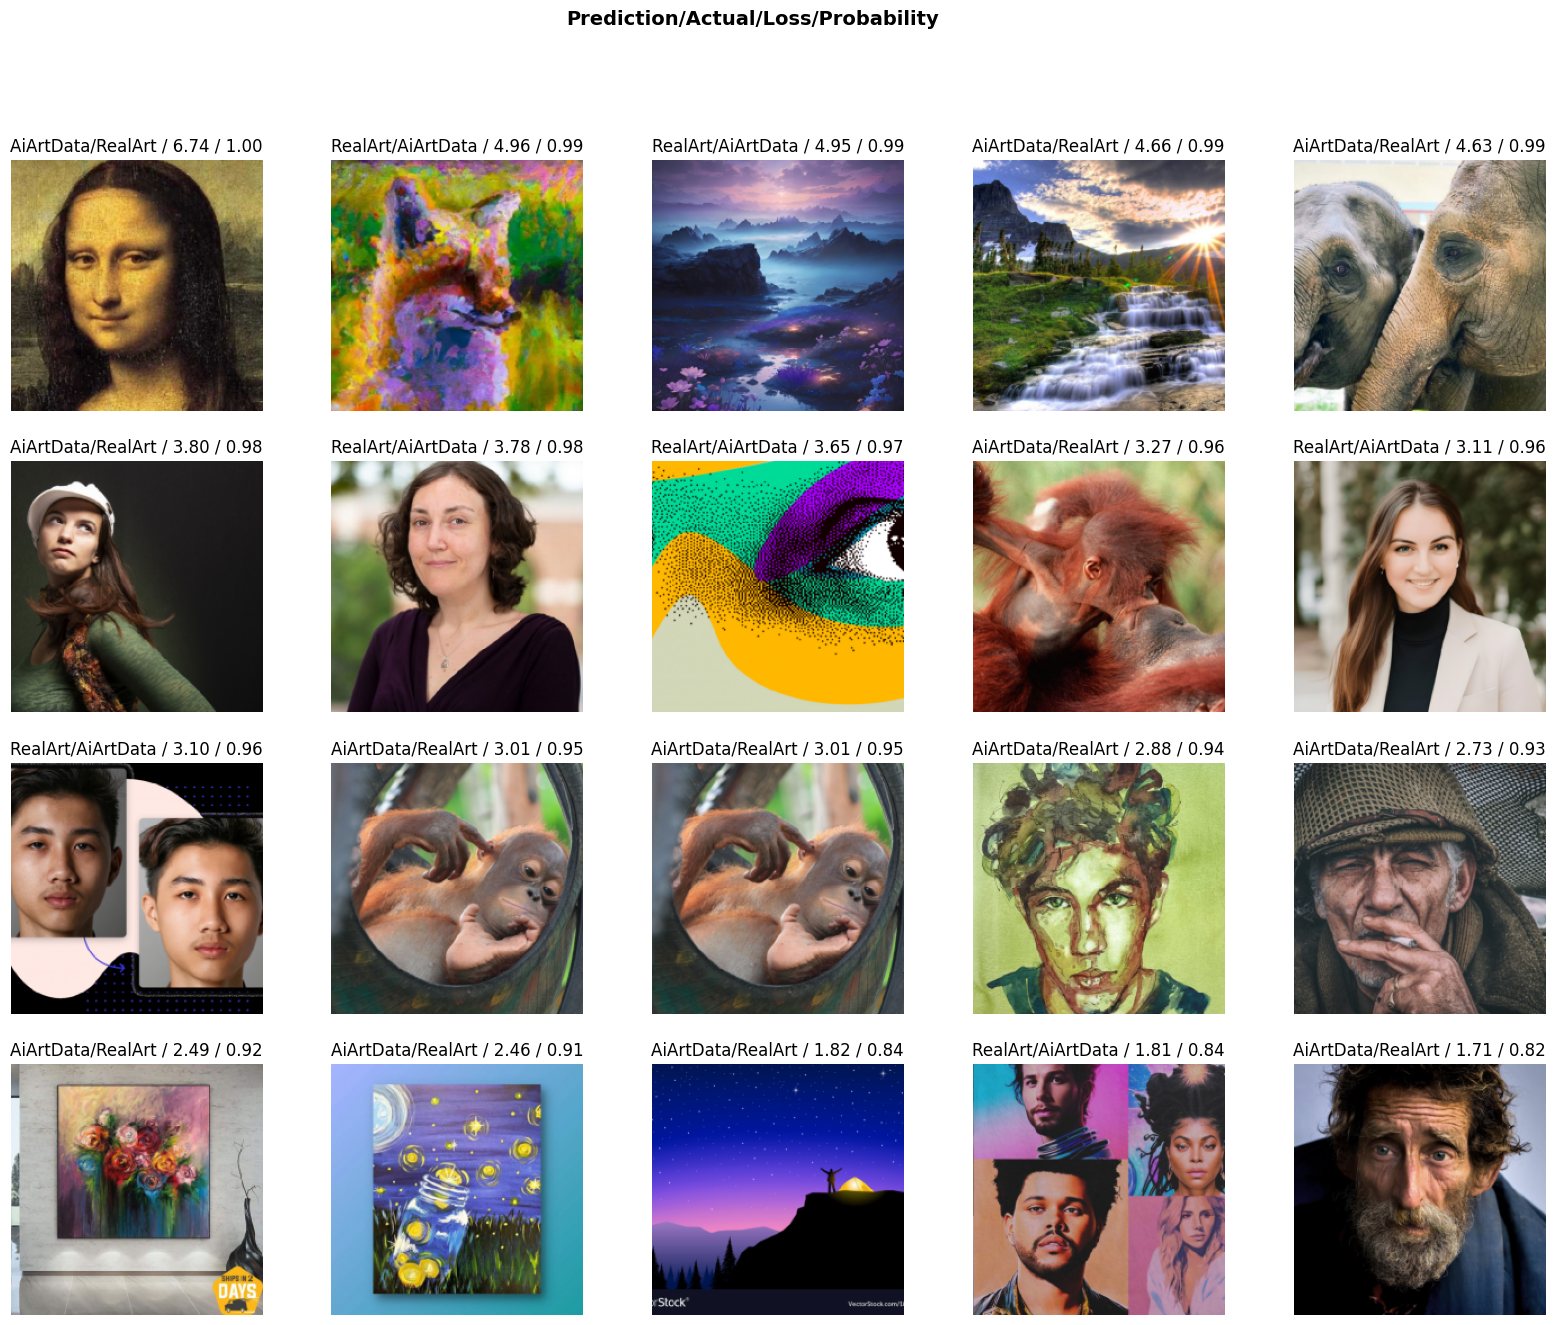

In [27]:
interp.plot_top_losses(20,figsize = (20,15))

In [28]:
preds, targets = learn.get_preds()

class_report = classification_report(targets, torch.argmax(preds, dim=1), target_names=dls.vocab)
print(class_report)

              precision    recall  f1-score   support

   AiArtData       0.83      0.88      0.85       104
     RealArt       0.85      0.80      0.82        90

    accuracy                           0.84       194
   macro avg       0.84      0.84      0.84       194
weighted avg       0.84      0.84      0.84       194



tensor([0.0010, 0.9990])


In [44]:
import tensorflow as tf
from PIL import Image 


In [46]:
def classify_image(image_path, learner):
    # Load the image using PIL
    img = Image.open(image_path)
    
    # Preprocess the image for prediction
    img = img.resize((224, 224))  # Resize to match model input size
    img = PILImage.create(np.array(img))  # Convert to fastai image format
    
    # Make predictions
    pred, _, _ = learner.predict(img)
    
    return pred


In [47]:
image=r"C:\Users\virin\OneDrive\Desktop\Synapse 2.0-Datadynamos\Images\AiArtData\AiArtData\-how-important-people-from-the-past-really-looked-11-Pics-5ffd5c0f4d77f__880.jpg"
prediction = classify_image(image, learn)
print("Predicted class:", prediction)


Predicted class: AiArtData


In [49]:
learn.export (path/'model.pk1')

In [51]:

learn1= load_learner(r"C:\Users\virin\OneDrive\Desktop\Synapse 2.0-Datadynamos\Images\model.pk1")

In [52]:
image=r"C:\Users\virin\OneDrive\Desktop\Synapse 2.0-Datadynamos\Images\AiArtData\AiArtData\-how-important-people-from-the-past-really-looked-11-Pics-5ffd5c0f4d77f__880.jpg"
prediction = classify_image(image, learn1)
print("Predicted class:", prediction)

Predicted class: AiArtData
